# Exponential methods

In [1]:
from basecode import *

In this chapter, exponential methods are introduced, with further analysis of some of them, being tested and compared to more classical equivalents.

All the codes that created the convergence and deduction tables are in the appendix.

The stiff problem used in all the convergence tables is the following one taken from [1]:

$$
    u'(t) + 100 u(t) = \sin(t)\\
    u(0) = 1.
$$

Solution: 

$$
u(t) = \exp(-100t)+\frac{\exp(-100t)+100\sin(t)-\cos(t)}{1+100^2}.
$$

## Exponential Euler method

Expression:

$$
  y(t_{k+1}) = e^{-h \lambda}y(t_k) + g(y(t_k), t_k) \frac{1-e^{-h \lambda}}{\lambda} + O(h^2).
$$

Table of convergence:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 4.398075514689716e-05 | - | 
 | 256 | 0.00390625 | 2.074422525626487e-05 | 1.0841625981445133 | 
 | 512 | 0.001953125 | 1.0056221183126109e-05 | 1.0446214904461004 | 
 | 1024 | 0.0009765625

The table proved the order of conergence given by the deduction, and, comparing to the one of the classic Euler method:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 0.2391072699739873 | - | 
 | 256 | 0.00390625 | 0.08650412059872986 | 1.466817233501749 | 
 | 512 | 0.001953125 | 0.039214210532948934 | 1.1413923006132296 | 
 | 1024 | 0.0009765625 | 0.018739566082401515 | 1.0652890085799935 | 

the exponential one has much better approximations since the beginning, proving the efficiency of the exponential method.

## Exponential time differencing methods (ETD)

Expression:

$$
y(t_{k+1}) = e^{-h \lambda}y(t_k) +
h\phi_1(-\lambda h) g(y(t_k), t_k) +
h^2\phi_2(-\lambda h) \frac{dg}{dt}(y(t_k), t_k) +
h^3\phi_3(-\lambda h)\frac{d^2g}{dt^2} (y(t_k), t_k) +
\dotsi + \\
h^n\phi_n(-\lambda h) \frac{d^{n-1}g}{dt^{n-1}} (y(t_k), t_k)+
O(h^{n+1}).
$$

It is possible to note that the exponential euler is essentially the exponential time differencing method of order 1.

In the same way as Taylor methods, the problem here is that at the expense of a higher order of convergence, ends up requiring the evaluation and implementation of multiple derivatives that may not even be easy to calculate. It can be avoided using Runge-Kutta methods, the next to be analyzed.

## Exponential time differencing methods with Runge-Kutta time stepping

Here, the exponential Runge-Kutta were compared to methods from deductions following the classic runge-kutta approach in the constant variation formula.

All convergence tables prove the deduced order.

However, it is remarkable how much better the exponential methods are in relation to the new ones presented here, showing that we cannot be naive and apply the integral approximations expecting an exponential Runge-Kutta performance, the treatment must be exact for the linear part, as is done in all exponential methods.

### Exponential - Trapezoidal rule

Expression:

$$
  y(t_{k+1}) = e^{-h \lambda} y(t_k) +
  h \phi_1 (-\lambda h) g(y(t_k), t_k) +
  \left[g(a_k, t_{k+1}) - g(y(t_k), t_k) \right] h \phi_2 (-\lambda h) + \\
  + O(h^3) \\
  \text{with } a_k = e^{-h \lambda}y(t_k) + g(y(t_k), t_k) \frac{1-e^{-h\lambda}}{\lambda}.
$$

Convergence table:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 4.186569175362864e-08 | - | 
 | 256 | 0.00390625 | 1.0575183428604418e-08 | 1.985085775819591 | 
 | 512 | 0.001953125 | 2.652380943352073e-09 | 1.9953227875115886 | 
 | 1024 | 0.0009765625 | 6.638462730912398e-10 | 1.9983668943519293 |

### Naive deduction - Trapezoidal rule

Expression:

$$
y(t_{k+1}) = e^{-h \lambda}y(t_k) + \frac{h}{2} \left[ e^{-\lambda h} g(y(t_k), t_k) + g(a_k, t_{k+1}) \right] +  O(h^3) \\
    \text{with } a_k = e^{-h \lambda}y(t_k) + g(y(t_k), t_k) h \phi_1 (-\lambda h).
$$

Convergence table:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 0.0004242643044311458 | - | 
 | 256 | 0.00390625 | 0.00010714498082271644 | 1.9853990333325726 | 
 | 512 | 0.001953125 | 2.6871031228085582e-05 | 1.9954406751889993 | 
 | 1024 | 0.0009765625 | 6.725136514989377e-06 | 1.9984162299862431 | 

 ### Exponential - Third order

Expression:

$$
  y(t_{k+1}) = e^{-h \lambda} y(t_k) +
  g\left(c'_k, t_{k+\frac{1}{2}}\right)
  h \phi_1(-h \lambda) + 
  \\
  \left[g(c_k, t_{k+1}) - g(y(t_k), t_k)\right]
  \left( h \phi_2 (-h \lambda) - \frac{h \phi_1(-h \lambda)}{2} \right) +
  \\
  + 4 \left[g(c_k, t_{k+1}) + g(y(t_k), t_k) - 2 g\left(c'_k, t_{k+\frac{1}{2}}\right) \right]
  \left( h \phi_3 (-h \lambda) + 
  \\
  \frac{h \phi_1(-h \lambda)}{8} - \frac{h \phi_2(-h \lambda)}{2} \right) + O(h^4),
$$

with

$$
  c_k = e^{-h \lambda} y(t_k) +
  h \phi_1 (-\lambda h) g(y(t_k), t_k) +
  \\
  \left[g(a_k, t_{k+1}) - g(y(t_k), t_k) \right] h \phi_2 (-\lambda h),
  \\
  a_k = e^{-h \lambda}y(t_k) + g(y(t_k), t_k) h \phi_1(-h\lambda),
  \\
  c'_k = e^{- \frac{h \lambda}{2}} y(t_k) +
  \\
  \frac{h}{2} \phi_1 \left(- \frac{\lambda h}{2} \right) g(y(t_k), t_k) +
  \\
  \left[g\left(a'_k, t_{k+\frac{1}{2}}\right) - g(y(t_k), t_k) \right] \frac{h}{2} \phi_2 \left(-\frac{\lambda h}{2}\right),
  \\
  a'_k = e^{-\frac{h \lambda}{2}}y(t_k) + 
  \\
  g(y(t_k), t_k) \frac{h}{2} \phi_1\left(-\frac{h \lambda}{2}\right).
$$

Convergence table:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 5.0853024048669315e-12 | - | 
 | 256 | 0.00390625 | 3.212833644961055e-13 | 3.9844153810116354 | 
 | 512 | 0.001953125 | 2.0132983821752326e-14 | 3.996213373698299 | 
 | 1024 | 0.0009765625 | 1.2602766052971504e-15 | 3.997748687591092 | 

 Better than what expected, giving order 4.

### Naive deduction - Trapezoidal rule

Expression:

$$
  y(t_{k+1}) = e^{-h \lambda}y(t_k) + 
  \\
  \frac{h}{6} \left[ e^{-\lambda h} g(y(t_k), t_k) + 
  \\
  4 e^{-\frac{ \lambda h}{2}} g\left( b'_{k}, t_k + 
  \\
  \frac{h}{2} \right) + g(b_k, t_{k+1}) \right] +  O(h^4), 
  \\
  \text{with } b'_{k} = e^{- \frac{h \lambda}{2}}y(t_k) + 
  \\
  \frac{h}{4} \left[ e^{- \frac{h \lambda}{2}} g(y(t_k), t_k) + 
  \\
  g \left(a'_{k}, t_k + \frac{h}{2} \right) \right], 
  \\
  b_k = e^{-h \lambda}y(t_k) + 
  \\
  \frac{h}{2} \left[ e^{-\lambda h} g(y(t_k), t_k) + 
  \\
  g(a_k, t_{k+1}) \right], \\
  a'_{k} = e^{- \frac{h \lambda}{2}} y(t_k) + 
  \\
  g(y(t_k), t_k) \frac{h}{2} \phi_1 \left(-\lambda \frac{h}{2} \right), 
  \\
  a_k = e^{-h \lambda}y(t_k) + g(y(t_k), t_k) h \phi_1 (-\lambda h).
$$

Convergence table:

| n | h = $\frac{1}{h}$ | $\tau(0,h)$ | q = $\frac{tau(0,h)}{tau(0, 2h)}$ |
|---|-----------------|-----------|---------------------------------|
 | 128 | 0.0078125 | 1.083876968009309e-06 | - | 
 | 256 | 0.00390625 | 6.883813637344194e-08 | 3.9768491535433466 | 
 | 512 | 0.001953125 | 4.322307012305515e-09 | 3.9933345852265947 | 
 | 1024 | 0.0009765625 | 2.705360744453822e-10 | 3.9979086629155343 | 

 Also with order 4, better than what expected.

## Graphics

Next, it is shown graphics from the same problem, but first showing the error as the linear part, $100$, changes from $0$ to $100$ and next with $\lambda = 100$ but changng the time step.

In [2]:
n = 128
lmba0 = 1
lmbaf = 100
t0 = 0.0
tf = 1.0
x0 = np.array([1])
lmba_1D_classic, domain = errors_for_lambdas_array(n, classic_euler, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_exponential, domain = errors_for_lambdas_array(n, exponential_euler, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_etd2rk, domain = errors_for_lambdas_array(n, etd2rk, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_etd2rk_trapezoidal_naive, domain = errors_for_lambdas_array(n, etd2rk_trapezoidal_naive, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_etd3rk_similar, domain = errors_for_lambdas_array(n, etd3rk_similar, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_etd3rk_naive, domain = errors_for_lambdas_array(n, etd3rk_naive, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_rk2, domain = errors_for_lambdas_array(n, rk2, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)
lmba_1D_rk4, domain = errors_for_lambdas_array(n, rk4, t0, tf, x0, lmba0, lmbaf, A_1D, g, sol_given_lmba, vectorize_sol_given_lmba, error_2)

/home/miki/IC/Relatorio_github/basecode.py:247: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.sqrt(float(np.sum(v)/x_approx.size)) #normalized


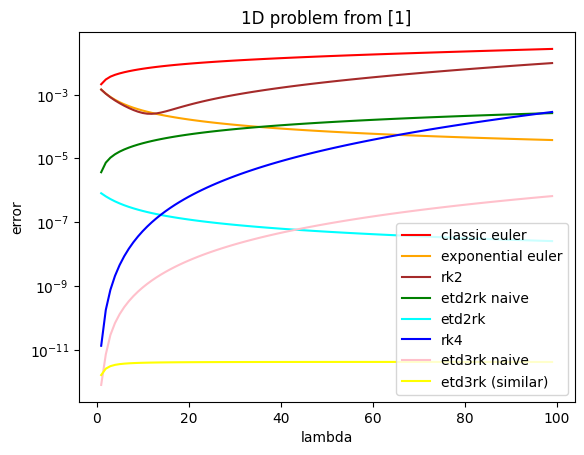

In [3]:
matrix_1D = [lmba_1D_classic, lmba_1D_exponential, lmba_1D_rk2, lmba_1D_etd2rk_trapezoidal_naive, lmba_1D_etd2rk, lmba_1D_rk4, lmba_1D_etd3rk_naive, lmba_1D_etd3rk_similar]
names = ['classic euler', 'exponential euler', 'rk2', 'etd2rk naive', 'etd2rk', 'rk4', 'etd3rk naive', "etd3rk (similar)"]
fig, ax = graphic_2D(8*[domain], matrix_1D, names, "lambda", "error", "1D problem from [1]", False, True)

Here it is notable that as the lambda increases, and so does the stiffness, the exponential methods deal really well, even dropping the error, since the exponential part is precisely solved, so, as it gains more relevance, the method perfoms better. Meanwhile, the other methods (classic and naive) start to decline, dealing badly with the stiffness. Just as predicted.

In [4]:
n0 = 10
k = 10
lmba = 100
A = lmba * np.array([[1]])
t0 = 0.0
tf = 1.0
x0 = np.array([1])
n_1D_classic, domain = errors_2x(n0, k, classic_euler, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_exponential, domain = errors_2x(n0, k, exponential_euler, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_etd2rk, domain = errors_2x(n0, k, etd2rk, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_etd2rk_trapezoidal_naive, domain = errors_2x(n0, k, etd2rk_trapezoidal_naive, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_etd3rk_similar, domain = errors_2x(n0, k, etd3rk_similar, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_etd3rk_naive, domain = errors_2x(n0, k, etd3rk_naive, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_rk2, domain = errors_2x(n0, k, rk2, t0, tf, x0, A, g, sol, vectorize_sol, error_2)
n_1D_rk4, domain = errors_2x(n0, k, rk4, t0, tf, x0, A, g, sol, vectorize_sol, error_2)

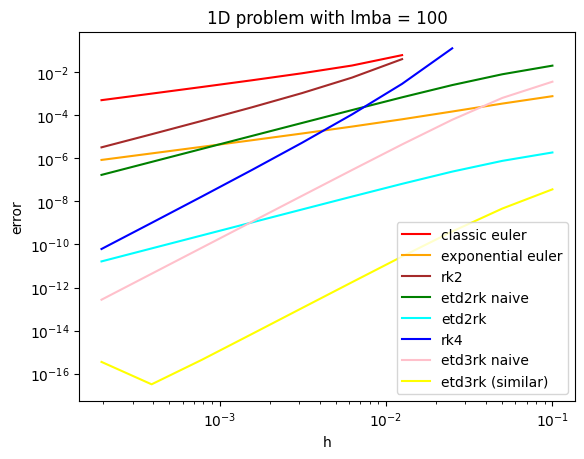

In [5]:
matrix_2D = [n_1D_classic, n_1D_exponential, n_1D_rk2, n_1D_etd2rk_trapezoidal_naive, n_1D_etd2rk, n_1D_rk4, n_1D_etd3rk_naive, n_1D_etd3rk_similar]
names = ['classic euler', 'exponential euler', 'rk2', 'etd2rk naive', 'etd2rk', 'rk4', 'etd3rk naive', "etd3rk (similar)"]
fig_2D, ax_2D = graphic_2D(8*[1/domain], matrix_2D, names, "h", "error", "1D problem with lmba = "+str(lmba), False, True)
plt.xscale('log')

Here is visually clear the orders already confirmed by the convergence tables.